# Data Cleaning

In [34]:
from utils import *

## Awards Players

In [35]:
#Read the dataset
awards_players_dataSet = pd.read_csv('../Other/basketballPlayoffs/awards_players.csv')

### Dealing with missing/duplicate/redundant data

/Users/lucadipietro/Desktop/UNI/Erasmus/ML/ML_G47/Code/1.Cleaning/utils.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


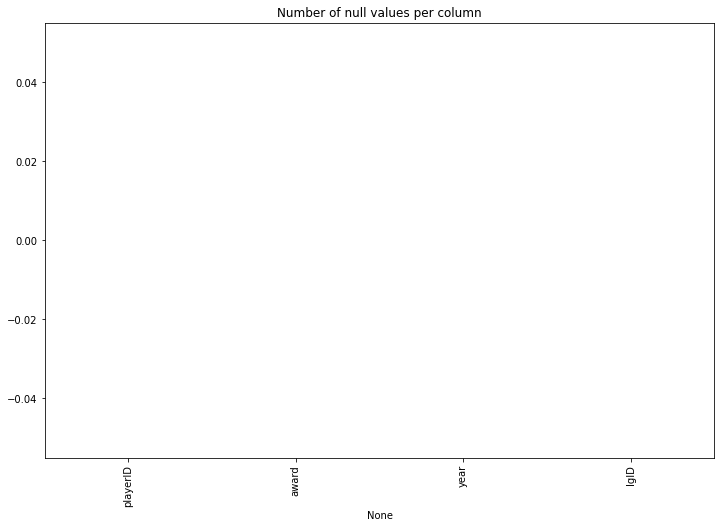

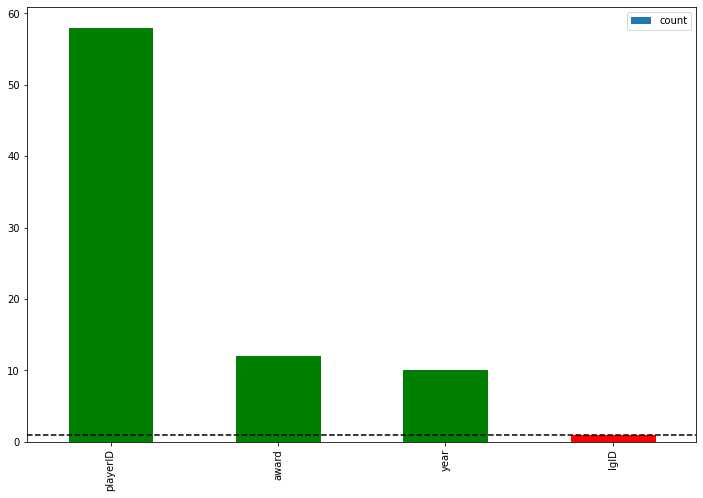

Removed 1 columns that had only one unique value
Removed 0 repeated rows


In [36]:
#check if there are null values in the dataset
nulls_values_by_column(awards_players_dataSet)

#check if there are unique values in the dataset
unique_values_by_column(awards_players_dataSet, 1)

#remove the column/s that have only one unique value
num_columns = len(awards_players_dataSet.columns)
awards_players_dataSet = filter_column_uniques(awards_players_dataSet, 1)
print(f"Removed {num_columns - len(awards_players_dataSet.columns)} columns that had only one unique value")

#remove duplicated rows (if present)
num_rows = awards_players_dataSet.shape[0]
awards_players_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - awards_players_dataSet.shape[0]} repeated rows")

### Outliers and Noise

In [37]:
awards_players_dataSet = awards_players_dataSet[awards_players_dataSet.award != 'Kim Perrot Sportsmanship']
awards_players_dataSet = awards_players_dataSet[awards_players_dataSet.award != 'Kim Perrot Sportsmanship Award']

#We are splitting the awards of the players and the coaches
df_coaches = pd.DataFrame(awards_players_dataSet[awards_players_dataSet.award == 'Coach of the Year'])
df_coaches.rename(columns={'playerID': 'coachID'}, inplace=True)

df_players = pd.DataFrame(awards_players_dataSet[awards_players_dataSet.award != 'Coach of the Year'])

### Shifting data

In [38]:
#Non so se è da fare

### Save dataset

In [39]:
df_players.to_csv('../newData/awards_players_cleaned.csv', index=False)
df_coaches.to_csv('../newData/awards_coaches_cleaned.csv', index=False)

## Coaches

In [40]:
coaches_dataSet = pd.read_csv('../Other/basketballPlayoffs/coaches.csv')

### Dealing with missing/duplicate/redundant data 

/Users/lucadipietro/Desktop/UNI/Erasmus/ML/ML_G47/Code/1.Cleaning/utils.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


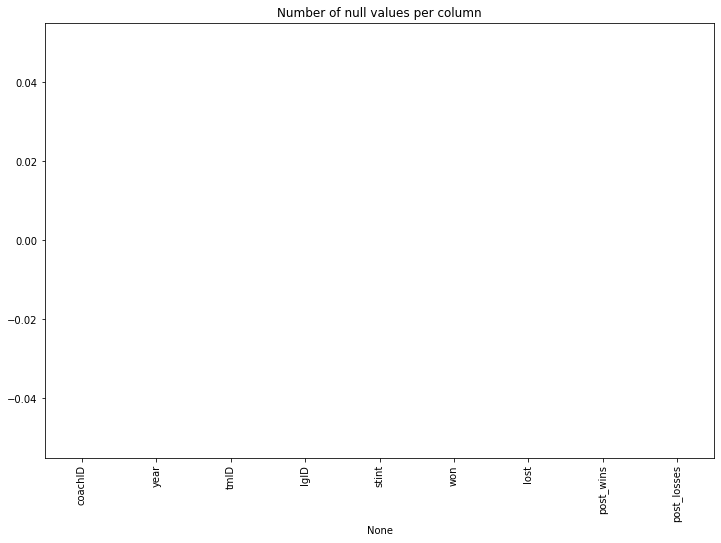

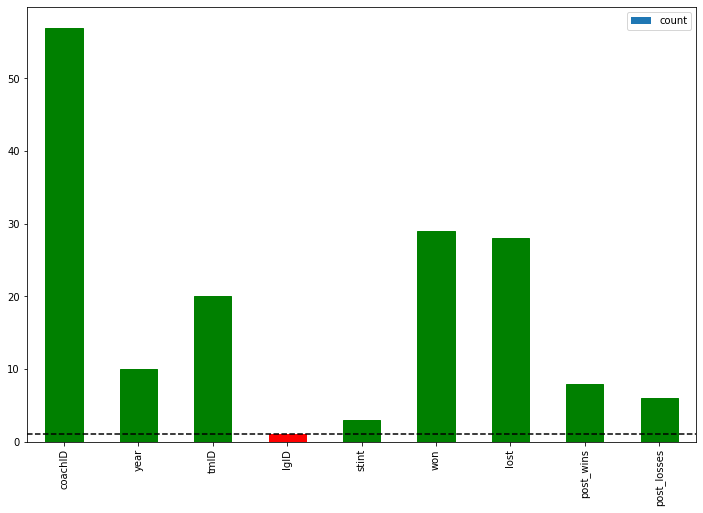

Removed 1 columns that had only one unique value
Removed 0 repeated rows


In [41]:
#check if there are null values in the dataset
nulls_values_by_column(coaches_dataSet)

#check if there are unique values in the dataset
unique_values_by_column(coaches_dataSet, 1)

#remove the column/s that have only one unique value
num_columns = len(coaches_dataSet.columns)
coaches_dataSet = filter_column_uniques(coaches_dataSet, 1)
print(f"Removed {num_columns - len(coaches_dataSet.columns)} columns that had only one unique value")

#remove duplicated rows (if present)
num_rows = coaches_dataSet.shape[0]
coaches_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - coaches_dataSet.shape[0]} repeated rows")


### Outliers and Noise

<Figure size 1080x720 with 0 Axes>

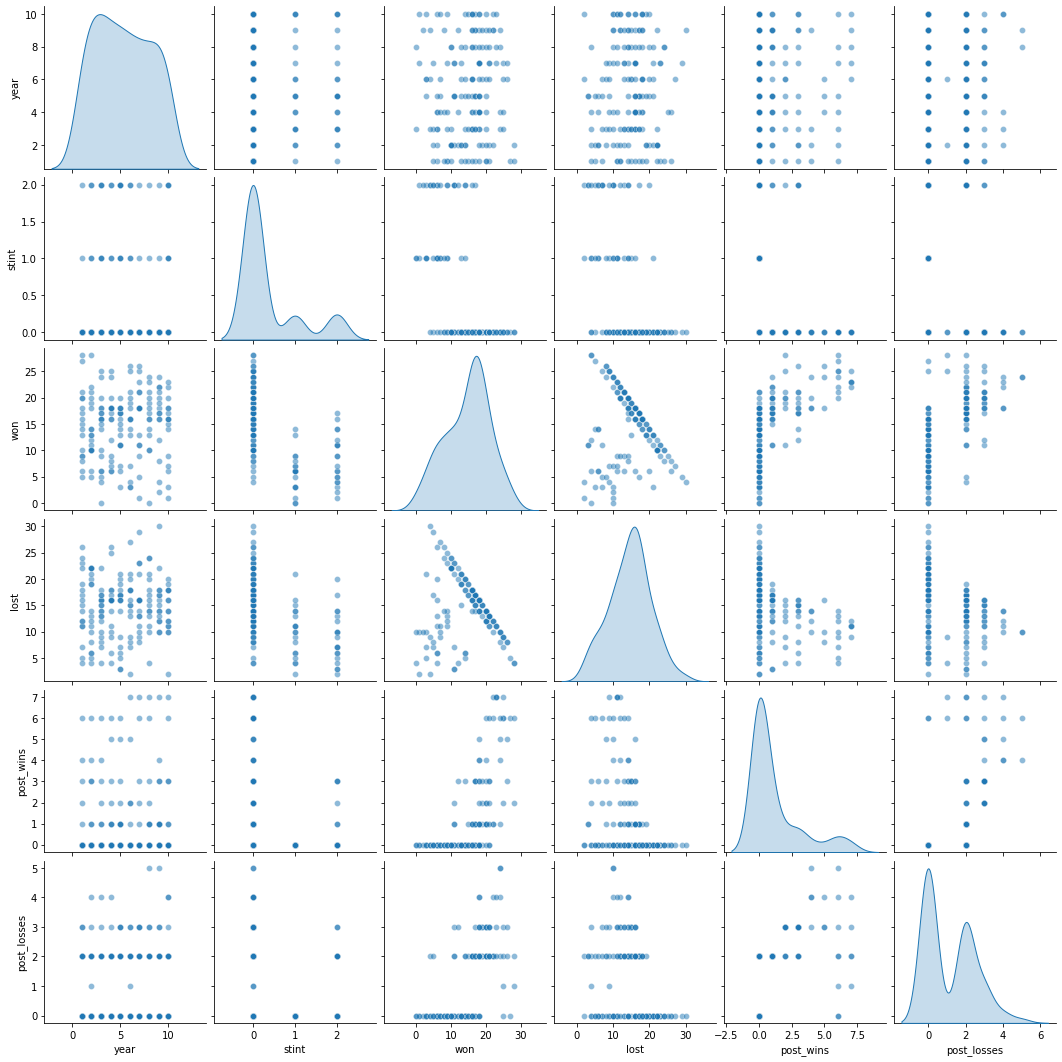

Founded 0 (0.0%) outliers
Removed 0 rows (0.0%)


In [42]:
# We are using the scatterplot to identify the presence of outliers
rows_to_drop = set()
init_num_rows_coaches = coaches_dataSet.shape[0]

scatter_plot(coaches_dataSet.drop(rows_to_drop))

print(f"Founded {len(rows_to_drop)} ({round(len(rows_to_drop) / coaches_dataSet.shape[0] * 100, 1)}%) outliers")
coaches_dataSet.drop(rows_to_drop, axis = 0, inplace=True)
print(f"Removed {init_num_rows_coaches - coaches_dataSet.shape[0]} rows ({round((init_num_rows_coaches - coaches_dataSet.shape[0]) / init_num_rows_coaches * 100, 1)}%)")

### Shifting the Data

In [43]:
#TODO

### Save Dataset

In [44]:
coaches_dataSet.to_csv('../newData/coaches_cleaned.csv', index=False)

## Players

In [45]:
players_dataSet = pd.read_csv('../Other/basketballPlayoffs/players.csv')

### Dealing with missing/duplicate/redundant data

/Users/lucadipietro/Desktop/UNI/Erasmus/ML/ML_G47/Code/1.Cleaning/utils.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


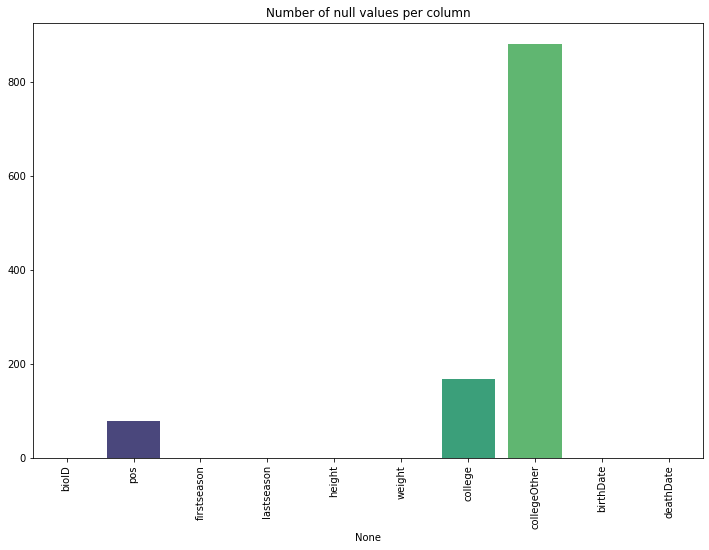

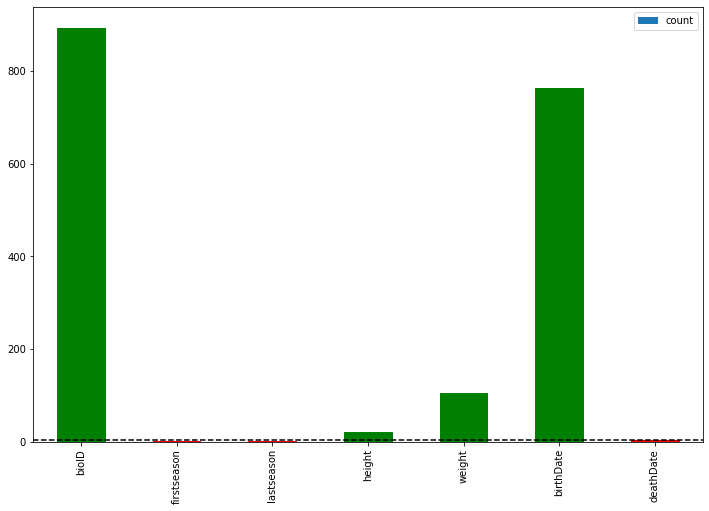

Removed 3 columns that had only five uniques values
Removed 0 repeated rows


In [46]:
nulls_values_by_column(players_dataSet)

players_dataSet.drop(columns=['collegeOther', 'pos', 'college'], inplace=True, axis=1)

unique_values_by_column(players_dataSet, 5)

num_columns = len(players_dataSet.columns)
players_dataSet = filter_column_uniques(players_dataSet, 5)
print(f"Removed {num_columns - len(players_dataSet.columns)} columns that had only five uniques values")

num_rows = players_dataSet.shape[0]
players_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - players_dataSet.shape[0]} repeated rows")

### Outliers and Noise

<Figure size 1080x720 with 0 Axes>

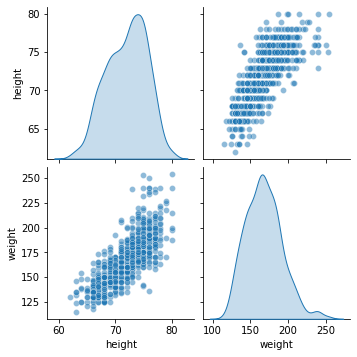

Founded 0 (0.0%) outliers
Removed 0 rows (0.0%)


Index(['bioID', 'height', 'weight', 'birthDate'], dtype='object')

In [47]:
#Remove the player still alive
players_dataSet = players_dataSet[players_dataSet.birthDate != '0000-00-00']

#Remove the player with wrong height
players_dataSet = players_dataSet[players_dataSet.height > 10]

#Remove the player that have a weight equal to zero
players_dataSet = players_dataSet[players_dataSet['weight'] != 0]

rows_to_drop = set()
init_num_rows_players = players_dataSet.shape[0]

scatter_plot(players_dataSet.drop(rows_to_drop, errors='ignore'))
print(f"Founded {len(rows_to_drop)} ({round(len(rows_to_drop) / players_dataSet.shape[0] * 100, 1)}%) outliers")
players_dataSet.drop(rows_to_drop, axis = 0, inplace=True, errors='ignore')
print(f"Removed {init_num_rows_players - players_dataSet.shape[0]} rows ({round((init_num_rows_players - players_dataSet.shape[0]) / init_num_rows_players * 100, 1)}%)")

players_dataSet.columns

### Convert birthdate in age

In [48]:
#TODO

### Save dataset

In [49]:
players_dataSet.to_csv('../newData/players_cleaned.csv', index=False)

## Players Teams

In [50]:
players_teams_dataSet = pd.read_csv('../Other/basketballPlayoffs/players_teams.csv')

### Dealing with missing/duplicate/redundant data

/Users/lucadipietro/Desktop/UNI/Erasmus/ML/ML_G47/Code/1.Cleaning/utils.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


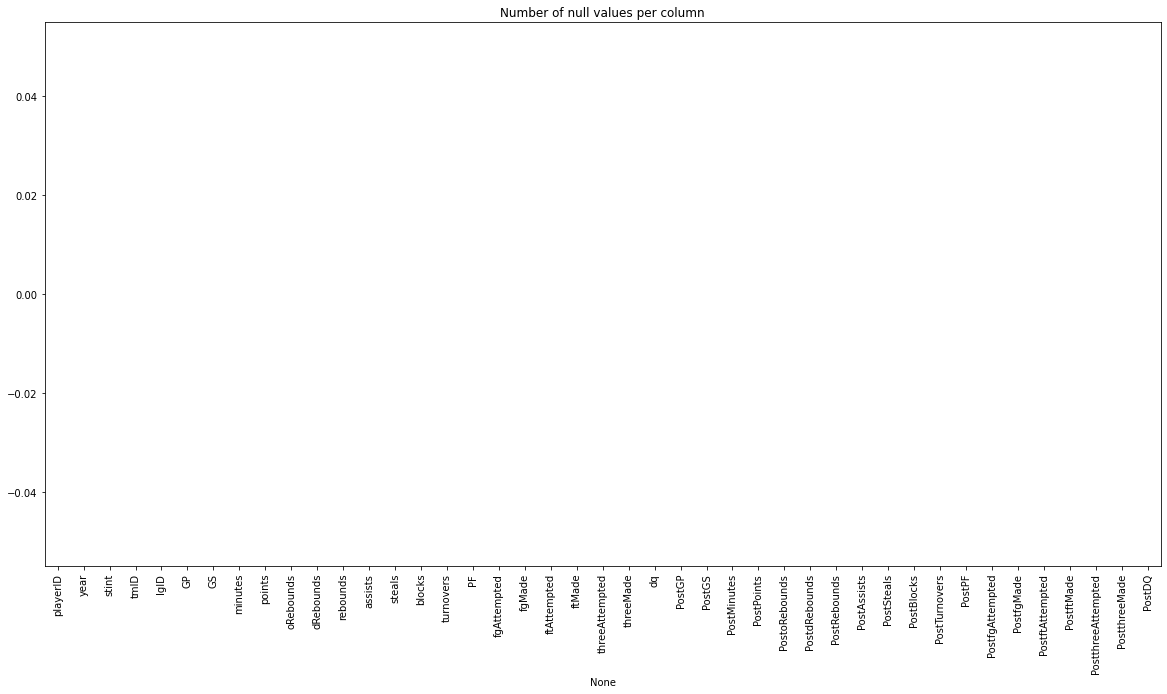

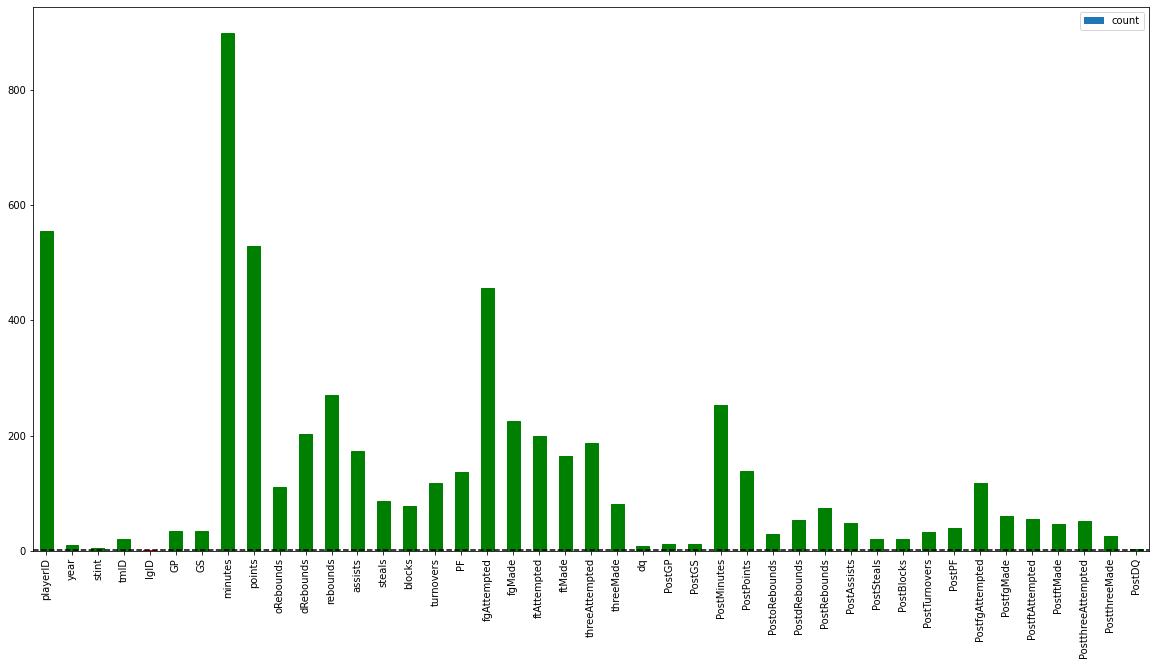

Removed 1 columns that had only one unique value
Removed 0 repeated rows


In [51]:
nulls_values_by_column(players_teams_dataSet, (20, 10))

unique_values_by_column(players_teams_dataSet, 1, (20,10))


num_columns = len(players_teams_dataSet.columns)
players_teams_dataSet = filter_column_uniques(players_teams_dataSet, 1)
print(f"Removed {num_columns - len(players_teams_dataSet.columns)} columns that had only one unique value")


num_rows = players_teams_dataSet.shape[0]

players_teams_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - players_teams_dataSet.shape[0]} repeated rows")

## Outliers and Noise

Removed 400 rows with zscore > 3


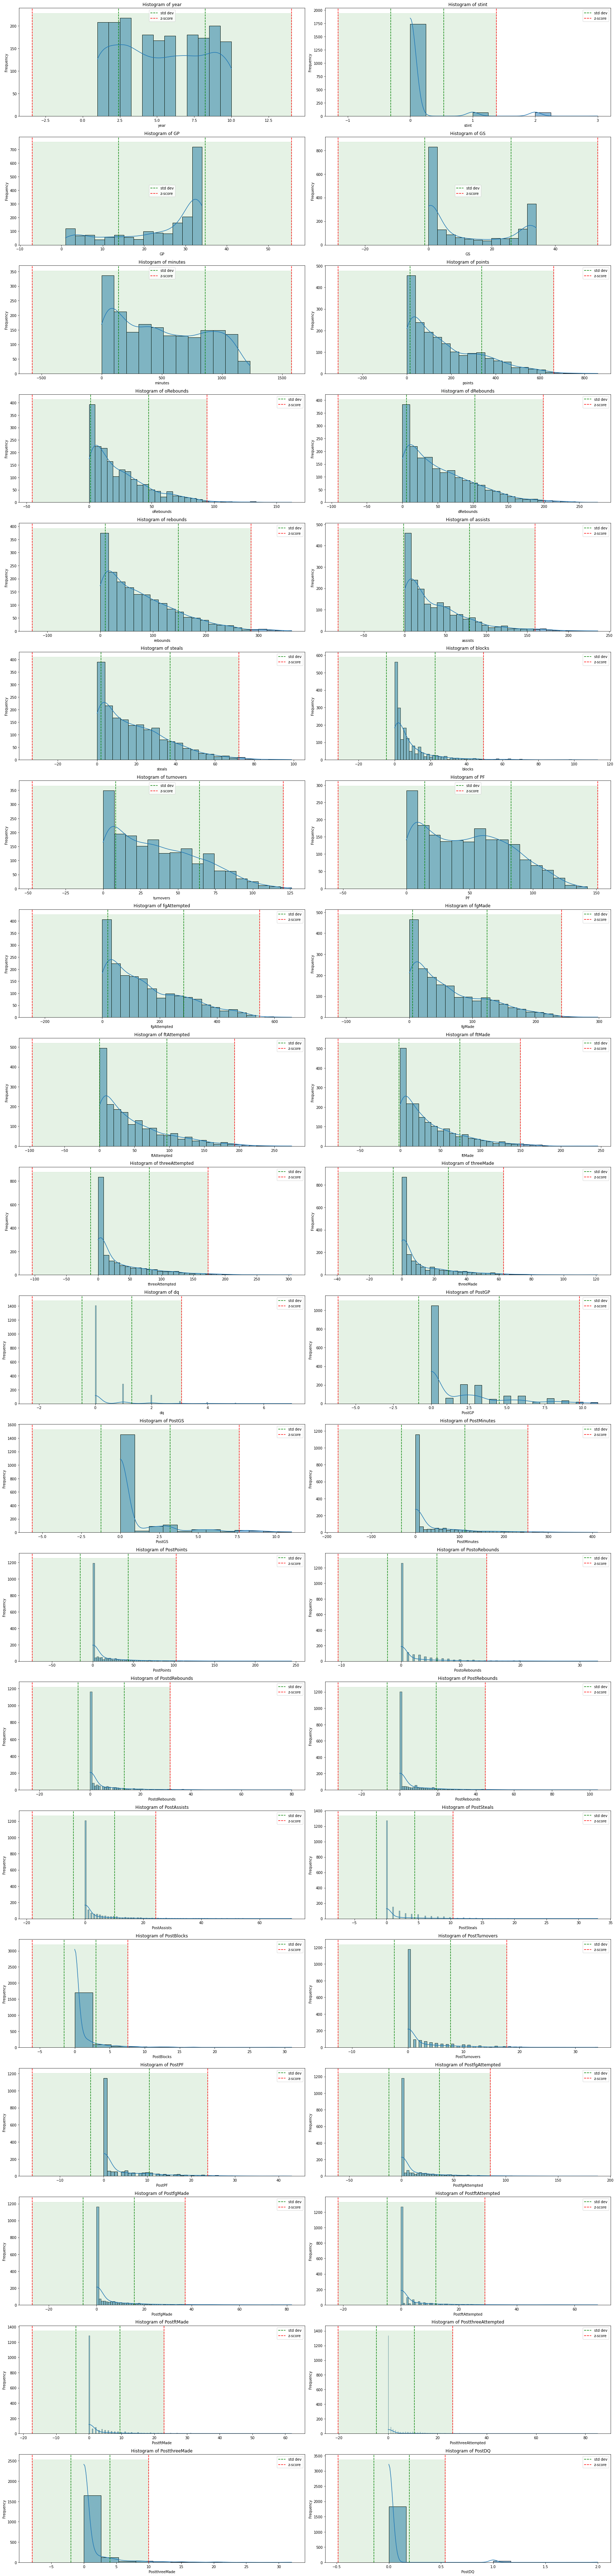

In [52]:
max_zscore = 3
rows2drop = set()
histogram_plot(players_teams_dataSet, max_zscore, (24, 100))


rows2drop_zscore = filter_by_zscore(players_teams_dataSet, max_zscore)
print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

rows2drop.update(rows2drop_zscore)

### Save dataset

In [53]:
#TODO
# prima di salvare capire cosa è la CBE Sum e se serve a qualcosa

players_teams_dataSet.to_csv('../newData/players_teams_cleaned.csv', index=False)

## Series Post

In [54]:
series_post_dataSet = pd.read_csv('../Other/basketballPlayoffs/series_post.csv')

### Dealing with missing/duplicate/redundant data

/Users/lucadipietro/Desktop/UNI/Erasmus/ML/ML_G47/Code/1.Cleaning/utils.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


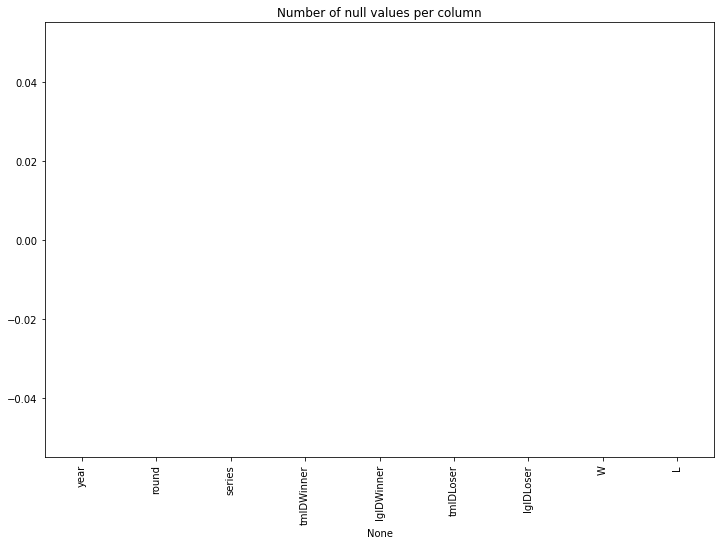

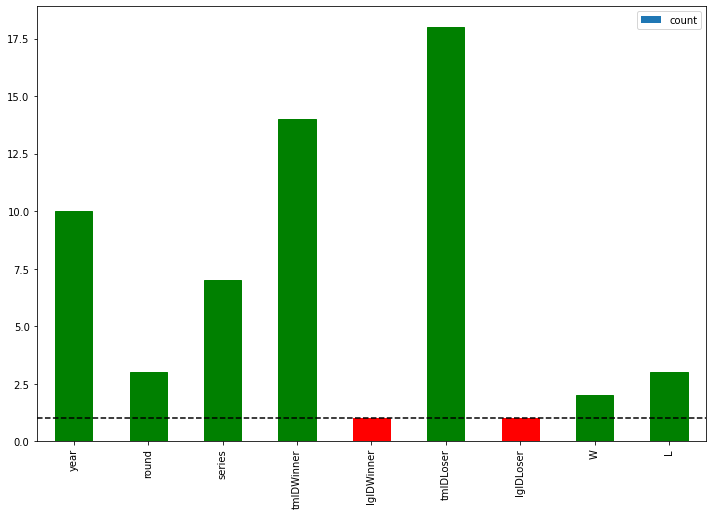

Removed 2 columns that had only one unique value
Removed 0 repeated rows


In [55]:
nulls_values_by_column(series_post_dataSet)

unique_values_by_column(series_post_dataSet, 1)

num_columns = len(series_post_dataSet.columns)
series_post_dataSet = filter_column_uniques(series_post_dataSet, 1)
print(f"Removed {num_columns - len(series_post_dataSet.columns)} columns that had only one unique value")

num_rows = series_post_dataSet.shape[0]
series_post_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - series_post_dataSet.shape[0]} repeated rows")

### Outliers and Noise

<Figure size 1080x720 with 0 Axes>

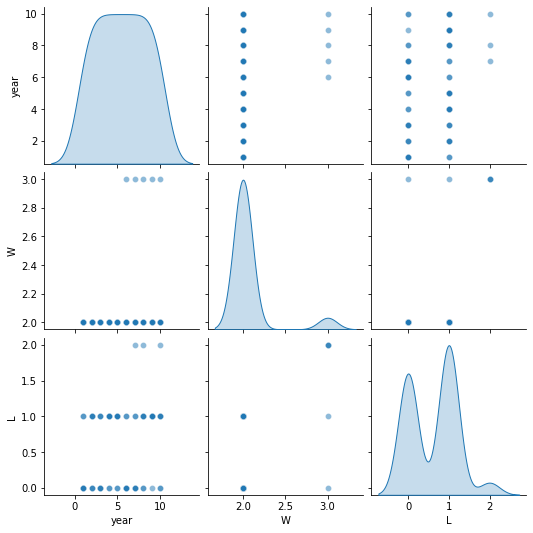

Founded 0 (0.0%) outliers
Removed 0 (0.0%) rows


In [56]:
rows2drop = set()
init_num_rows_series = series_post_dataSet.shape[0]

scatter_plot(series_post_dataSet.drop(rows2drop))

print(f"Founded {len(rows2drop)} ({round(len(rows2drop) / series_post_dataSet.shape[0] * 100, 1)}%) outliers")
series_post_dataSet.drop(rows2drop, axis = 0, inplace=True)
print(f"Removed {init_num_rows_series - series_post_dataSet.shape[0]} ({round((init_num_rows_series - series_post_dataSet.shape[0]) / init_num_rows_series * 100, 1)}%) rows")

### Save Dataset

In [57]:
#TODO
# capire se serve lo shift

series_post_dataSet.to_csv('../newData/series_post_cleaned.csv', index=False)

## Teams

In [58]:
teams_dataSet = pd.read_csv('../Other/basketballPlayoffs/teams.csv')

### Dealing with missing/duplicate/redundant data

/Users/lucadipietro/Desktop/UNI/Erasmus/ML/ML_G47/Code/1.Cleaning/utils.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


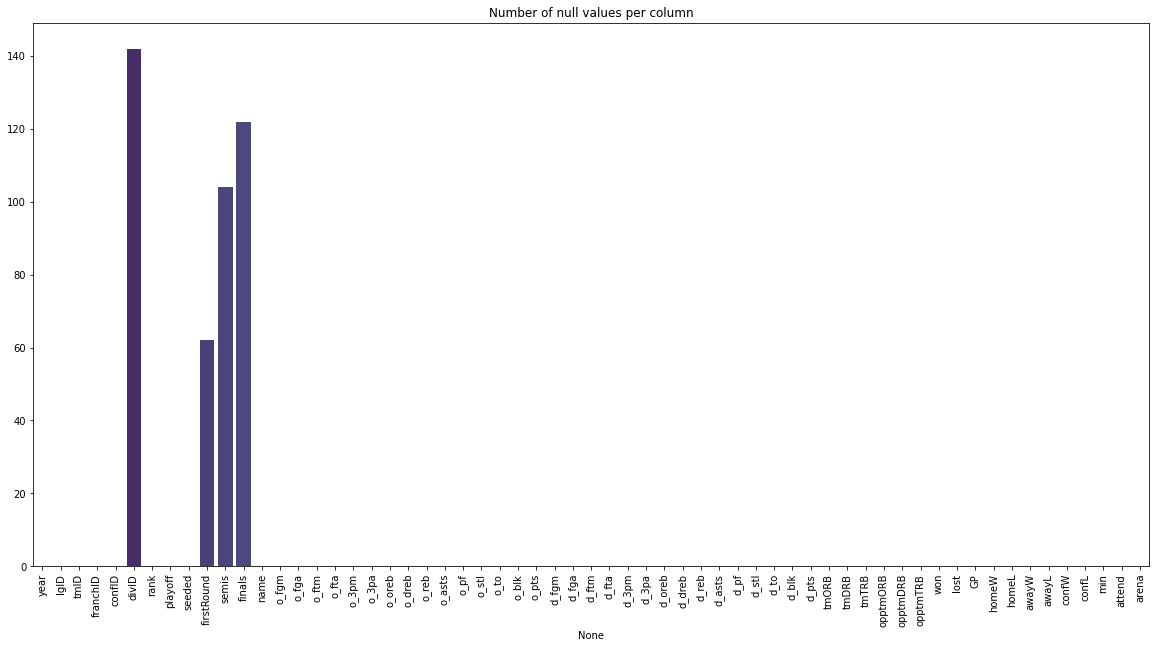

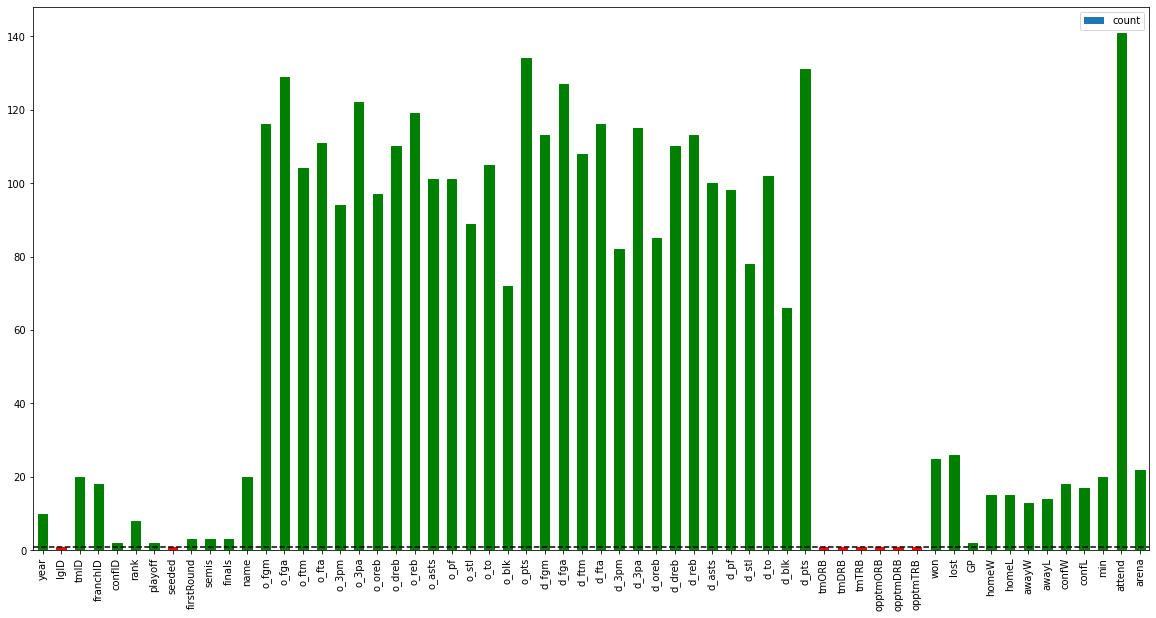

Removed 8 columns that had only one unique value
Removed 0 repeated rows


In [59]:
nulls_values_by_column(teams_dataSet, (20, 10))

teams_dataSet.drop(["divID"], inplace=True, axis=1)
teams_dataSet.fillna("N", inplace=True)

unique_values_by_column(teams_dataSet, 1, (20, 10))

num_columns = len(teams_dataSet.columns)
teams_dataSet = filter_column_uniques(teams_dataSet, 1)
print(f"Removed {num_columns - len(teams_dataSet.columns)} columns that had only one unique value")

num_rows = teams_dataSet.shape[0]
teams_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - teams_dataSet.shape[0]} repeated rows")

### Outliers and Noise

In the year 6 there are 2 winners, Connecticut Sun and Sacramento Monarchs. We decided to consider Connecticut Sun as winner

In [60]:
# change the winner to False in year 6 team Sacramento Monarchs
teams_dataSet.loc[(teams_dataSet["year"] == 6) & (teams_dataSet["name"] == "Sacramento Monarchs"), "finals"] = "N"

Removed 9 rows with zscore > 3


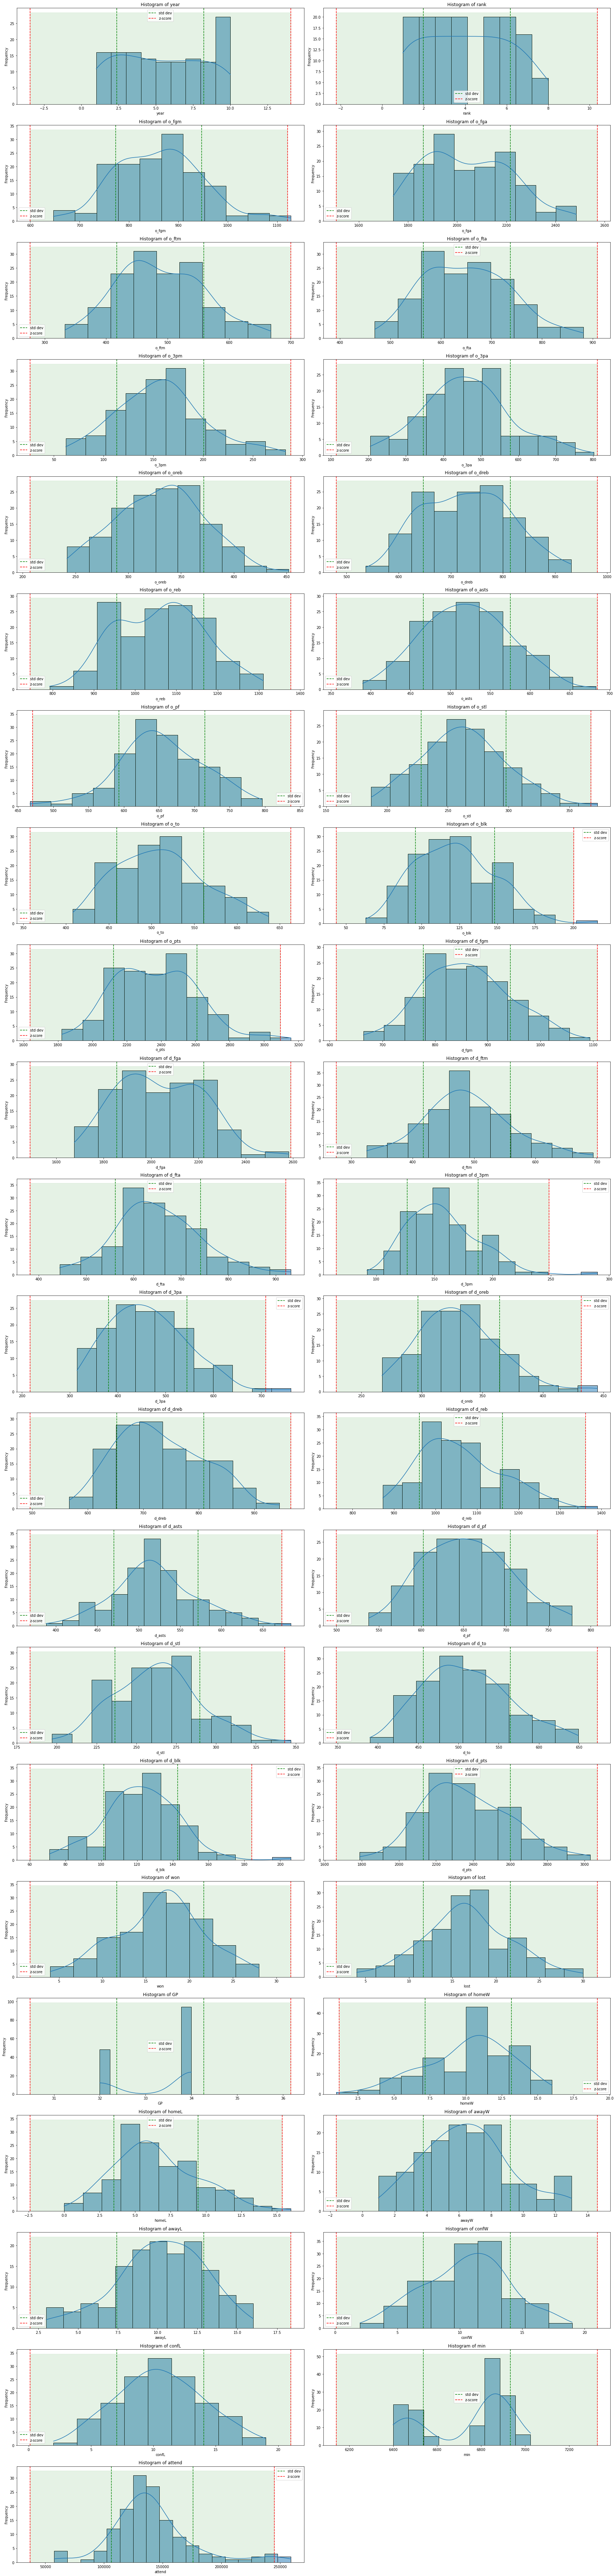

In [61]:
max_zscore = 3
rows2drop = set()
histogram_plot(teams_dataSet, max_zscore, (24, 100))


rows2drop_zscore = filter_by_zscore(teams_dataSet, max_zscore, ["attend"])
print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

rows2drop.update(rows2drop_zscore)

### Save dataset

In [62]:
#TODO
#Capire se serve fare lo shift

teams_EA = teams_dataSet[teams_dataSet['confID'] == 'EA']
teams_WE = teams_dataSet[teams_dataSet['confID'] == 'WE']

#Split the data for each conference
teams_EA.to_csv('../newData/teams_EA_cleaned.csv', index=False)
teams_WE.to_csv('../newData/teams_WE_cleaned.csv', index=False)

## Teams Post

In [63]:
teams_post_dataSet = pd.read_csv('../Other/basketballPlayoffs/teams_post.csv')

### Dealing with missing/duplicate/redundant data

/Users/lucadipietro/Desktop/UNI/Erasmus/ML/ML_G47/Code/1.Cleaning/utils.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


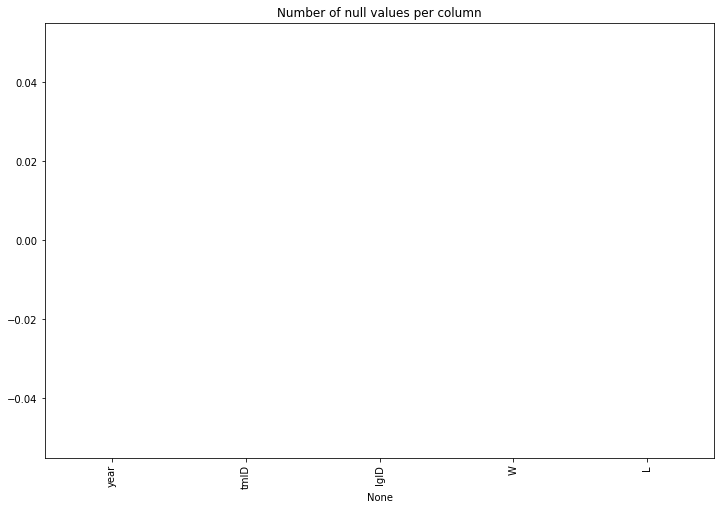

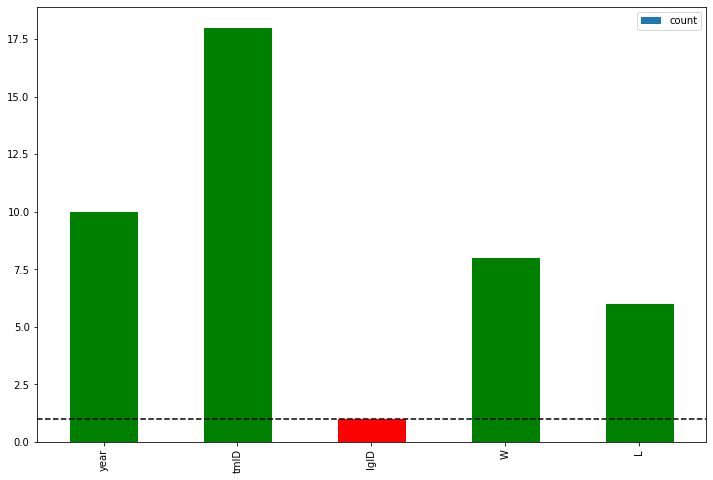

Removed 1 columns that had only one unique value
Removed 0 repeated rows


In [64]:
nulls_values_by_column(teams_post_dataSet)

unique_values_by_column(teams_post_dataSet, 1)

num_columns = len(teams_post_dataSet.columns)
teams_post_dataSet = filter_column_uniques(teams_post_dataSet, 1)
print(f"Removed {num_columns - len(teams_post_dataSet.columns)} columns that had only one unique value")

num_rows = teams_post_dataSet.shape[0]
teams_post_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - teams_post_dataSet.shape[0]} repeated rows")

### Outliers and Noise

Removed 0 rows with zscore > 3


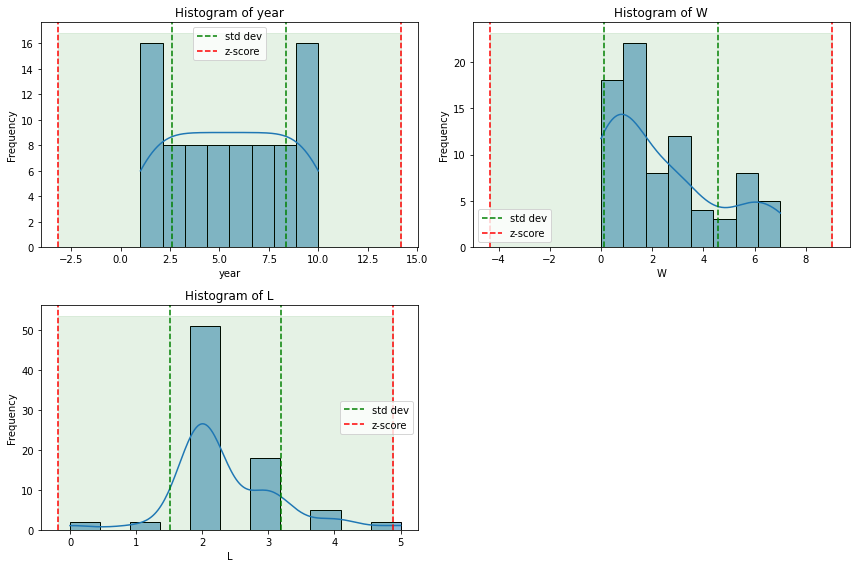

In [65]:
max_zscore = 3
rows2drop = set()
histogram_plot(teams_post_dataSet, max_zscore)

rows2drop_zscore = filter_by_zscore(teams_post_dataSet, max_zscore, ['L'])
print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

rows2drop.update(rows2drop_zscore)

### Save dataset

In [66]:
#TODO
#Capire se serve lo shift

teams_post_dataSet.to_csv('../newData/teams_post_cleaned.csv', index=False)